In [12]:
import pandas as pd

data = pd.read_csv('../data/data.csv')

data.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


## Para analise, discartaremos o endereço(rua) e o total(aluguel+taxas)

In [13]:
data = data.drop(columns=['address', 'total'])
data.head()


,district,area,bedrooms,garage,type,rent
0,Belenzinho,21,1,0,Studio e kitnet,2400
1,Vila Marieta,15,1,1,Studio e kitnet,1030
2,Pinheiros,18,1,0,Apartamento,4000
3,Vila Ré,56,2,2,Casa em condomínio,1750
4,Bela Vista,19,1,0,Studio e kitnet,4000


## Verificando dados (não tem valores null)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  11657 non-null  object
 1   area      11657 non-null  int64 
 2   bedrooms  11657 non-null  int64 
 3   garage    11657 non-null  int64 
 4   type      11657 non-null  object
 5   rent      11657 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 546.5+ KB


## Verificando e removendo duplicadas

In [15]:
duplicatas = data[data.duplicated()]
print(duplicatas.shape[0])

34


In [16]:
data = data.drop_duplicates().reset_index(drop=True)
print(data.shape[0])

11623


## Primeiras visualizações

In [17]:
data.describe()

,area,bedrooms,garage,rent
count,11623.000000,11623.000000,11623.000000,11623.000000
mean,84.785339,1.968167,1.062634,3254.496085
std,74.083898,0.931495,1.132900,2653.235019
min,0.000000,0.000000,0.000000,500.000000
25%,40.000000,1.000000,0.000000,1590.000000
50%,60.000000,2.000000,1.000000,2420.000000
75%,96.000000,3.000000,2.000000,3800.000000
max,580.000000,6.000000,6.000000,25000.000000


In [23]:
import seaborn as sns  
import matplotlib.pyplot as plt

variaveis_numericas = ['rent', 'bedrooms', 'garage', 'area']


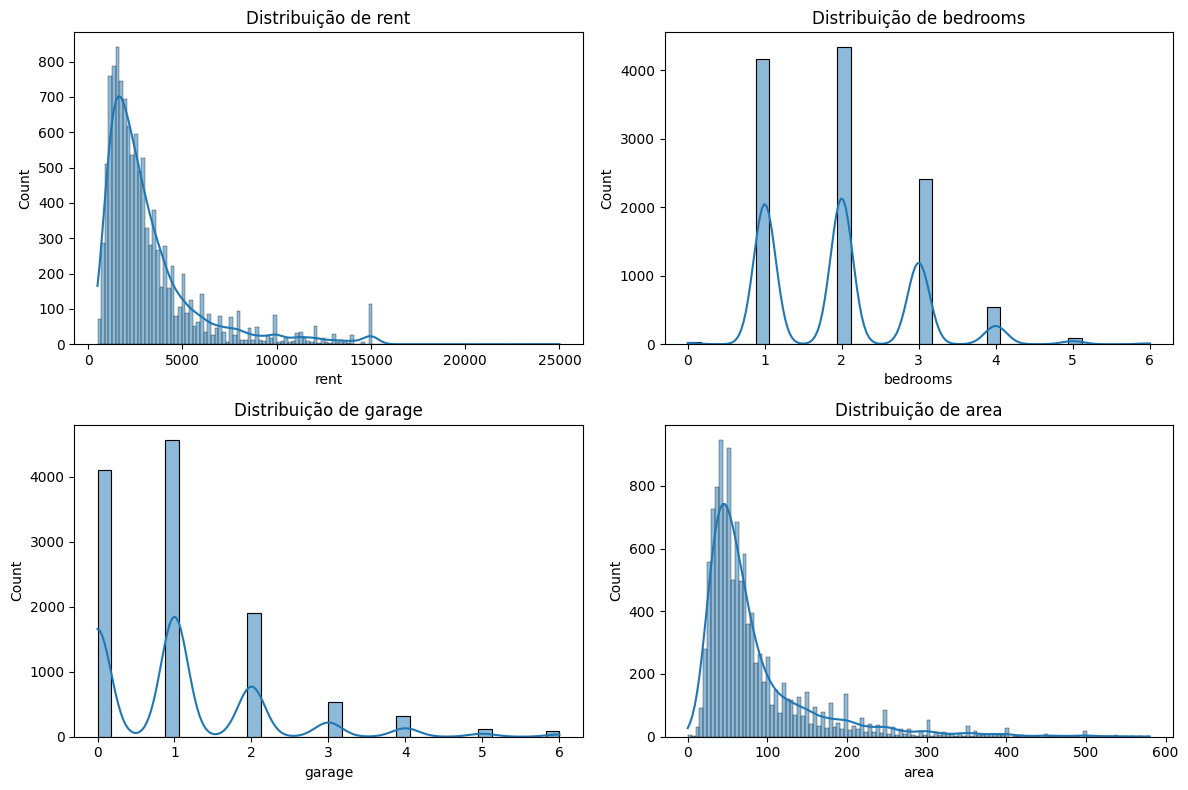

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for i, var in enumerate(variaveis_numericas):
    sns.histplot(data[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribuição de {var}')
plt.tight_layout()
plt.show()


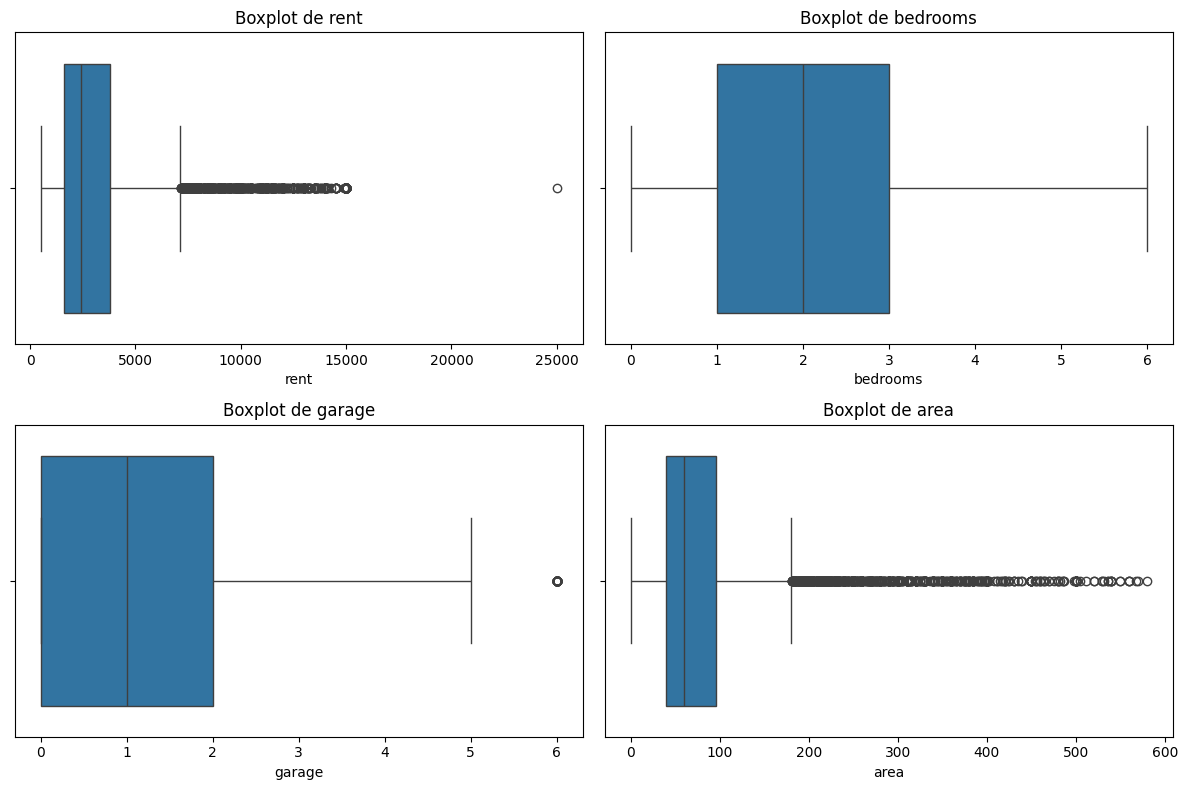

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for i, var in enumerate(variaveis_numericas):
    sns.boxplot(data=data, x=var, ax=axes[i])
    axes[i].set_title(f'Boxplot de {var}')
plt.tight_layout()
plt.show()


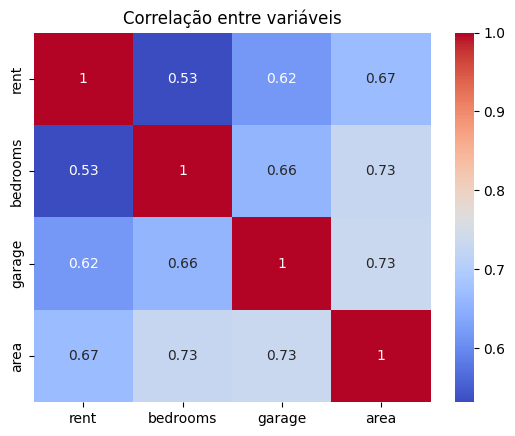

In [31]:
dados_numericos = data[variaveis_numericas]
sns.heatmap(dados_numericos.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis')
plt.show()